<a href="https://colab.research.google.com/github/Nore-gibhub/challenge2-data-science-LATAM/blob/main/Challenge2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telecom X - Análisis de Evasión de Clientes**



##Cargando la data la cual esta en un archivo Json

Previo a la carga de los datos, este archivo Json fue revisado en https://jsonviewer.stack.hu/, para entender como se estaban estructurando los datos, de igual se reviso una muestra en https://jsoncrack.com/editor (no se pudo revisar el archivo completo debido a que contenia mucha información)

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
datos_clientes = pd.read_json('TelecomX_Data.json')

In [117]:
datos_clientes

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


## Normalizando archivo Json


In [118]:
columnas_anidadas = ['customer','phone','internet','account']

df_normalizado = []
for col in columnas_anidadas:
    df_temp = (pd.json_normalize(datos_clientes[col]).add_prefix(f''+col+'_'))
    df_normalizado.append(df_temp)

df_final = pd.concat([datos_clientes.drop(columns=columnas_anidadas)] + df_normalizado, axis=1)

df_final.sample(6)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
1597,2267-WTPYD,No,Female,1,Yes,No,57,Yes,Yes,Fiber optic,...,Yes,Yes,No,No,Yes,Month-to-month,No,Credit card (automatic),94.00,5438.95
4826,6614-VBEGU,No,Female,0,Yes,No,24,Yes,No,DSL,...,Yes,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),69.45,1614.05
5098,6968-MHOMU,No,Male,0,Yes,No,58,No,No phone service,DSL,...,No,No,No,Yes,Yes,One year,Yes,Credit card (automatic),45.00,2689.35
6744,9294-TDIPC,No,Male,0,No,Yes,5,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,83.75
2709,3752-CQSJI,No,Female,0,Yes,Yes,13,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,254.5
4099,5619-PTMIK,No,Female,0,Yes,No,46,Yes,Yes,DSL,...,No,No,No,No,No,Month-to-month,No,Electronic check,53.10,2459.8


##Verificando información relevante de la data

In [119]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [120]:
espacios_blanco = (df_final == " ") | (df_final == "")
espacios_blanco.sum()

,0
customerID,0
Churn,224
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


##Limpiando la data antes de iniciar el análisis

In [121]:
# Convirtiendo espacios vacíos a NaN y luego a float
df_final['account_Charges.Total'] = pd.to_numeric(df_final['account_Charges.Total'], errors='coerce')

# Filtrando: Mensual > 0 Y Total es nulo
registros_problema = df_final[(df_final['account_Charges.Monthly'] > 0) &
                              (df_final['account_Charges.Total'].isna())]

registros_problema

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [122]:
# Hay 11 valores NaN en la columna de cargos totales, por lo que acá hay que calcular el total,
#sumando los valores mensuales de cada uno de esos registros:

# 1. Identificamos las filas donde falta el total pero hay mensual
mask_faltantes = df_final['account_Charges.Monthly'].notna() & df_final['account_Charges.Total'].isna()

# 2. Rellenamos el total como Cargos Mensuales * 12
df_final.loc[mask_faltantes, 'account_Charges.Total'] = df_final.loc[mask_faltantes, 'account_Charges.Monthly'] * 12

print(f"Se han corregido {mask_faltantes.sum()} registros.")

Se han corregido 11 registros.


In [123]:
#Verificando los tipos de valores que tengo, donde puedo ver que hay SI, NO y blancos
df_final['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [124]:
# Filtramos el DataFrame para que solo contenga 'Yes' y 'No'
df_final = df_final[df_final['Churn'].isin(['Yes', 'No'])]

In [125]:
espacios_blanco = (df_final == " ") | (df_final == "")
espacios_blanco.sum()


,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


## **Análisis descriptivo**

Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [126]:
Metricas = df_final.describe().round(2)
Metricas

,customer_SeniorCitizen,customer_tenure,account_Charges.Monthly,account_Charges.Total
count,7043.00,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76,2280.51
std,0.37,24.56,30.09,2266.12
min,0.00,0.00,18.25,18.80
25%,0.00,9.00,35.50,400.15
50%,0.00,29.00,70.35,1394.55
75%,0.00,55.00,89.85,3786.60
max,1.00,72.00,118.75,8684.80


## **Distribución de evasión**

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

In [127]:
#Cantidad de clientes que evadieron

Dist_Churn = df_final.Churn.value_counts()
Dist_Churn

,count
Churn,
No,5174
Yes,1869


In [128]:
#Cantidad de clientes que evadieron porcentual

Dist_Churn_Porcentaje = (df_final.Churn.value_counts(normalize=True).round(3)*100).map("{:.1f}%".format)
Dist_Churn_Porcentaje

,proportion
Churn,
No,73.5%
Yes,26.5%


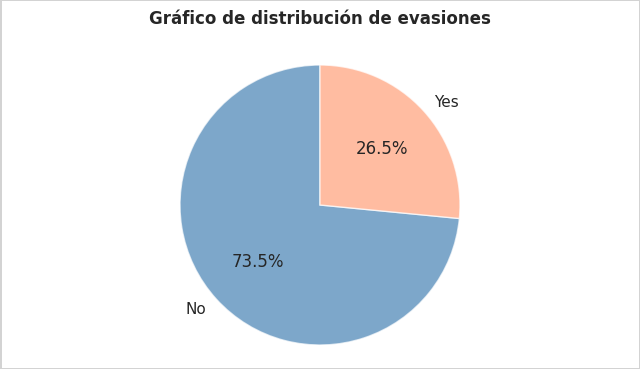

In [129]:
valores = Dist_Churn.values
etiquetas = Dist_Churn.index

colores_porciones = ['steelblue', 'lightsalmon']

plt.figure(figsize=(8, 4), edgecolor='lightgray', linewidth=2)

plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=colores_porciones, wedgeprops={'alpha': 0.7})

plt.title('Gráfico de distribución de evasiones', fontsize=12, fontweight='bold', pad=20)
plt.axis('equal')

plt.show()

## **Recuento de evasión por variables categóricas**

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.
Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

In [130]:
#Verificando si existe una tendencia a la evasion por sexo
Evasion_por_sexo = (df_final.groupby('customer_gender')['Churn'].value_counts(normalize=True).unstack().round(4)*100).map("{:.1f}%".format)
Evasion_por_sexo

Churn,No,Yes
customer_gender,,
Female,73.1%,26.9%
Male,73.8%,26.2%


In [131]:
#Verificando si existe una tendencia a la evasion por carga familiar
Evasion_por_carga = (df_final.groupby('customer_Dependents')['Churn'].value_counts(normalize=True).unstack().round(4)*100).map("{:.1f}%".format)
Evasion_por_carga

Churn,No,Yes
customer_Dependents,,
No,68.7%,31.3%
Yes,84.5%,15.4%


In [132]:
#Verificando si existe una tendencia a la evasion por influencia de la pareja
Evasion_por_influencia = (df_final.groupby('customer_Partner')['Churn'].value_counts(normalize=True).unstack().round(4)*100).map("{:.1f}%".format)
Evasion_por_influencia

Churn,No,Yes
customer_Partner,,
No,67.0%,33.0%
Yes,80.3%,19.7%


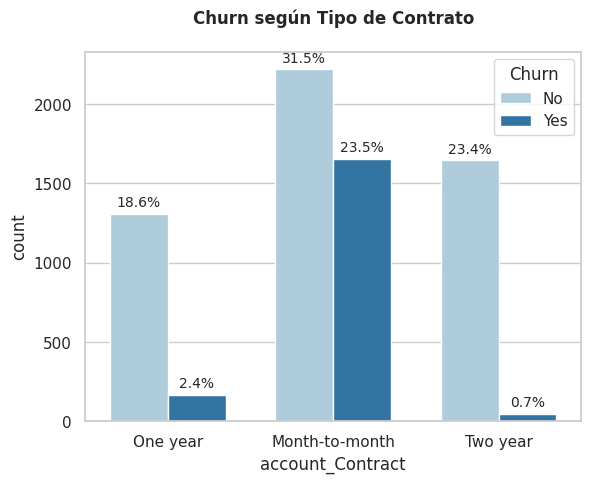

In [133]:
#Verificando si existe una tendencia a la evasion por tipo de contrato

# 1. Creamos el gráfico asignándolo a una variable 'ax'
ax = sns.countplot(x='account_Contract', hue='Churn', data=df_final, palette='Paired', width=0.7)

# 2. Calculamos el total de filas para obtener el porcentaje
total = len(df_final)

# 3. Iteramos sobre los contenedores de barras (containers)
for container in ax.containers:
    # Creamos las etiquetas: (valor de la barra / total) * 100
    labels = [f'{(v.get_height() / total):.1%}' for v in container]

    # Añadimos las etiquetas al gráfico
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, padding=3)

plt.title('Churn según Tipo de Contrato', fontsize=12, fontweight='bold', pad=20)
plt.show()

In [134]:
# Filtramos y creamos un nuevo DataFrame que solo contenga los registros de evasiones
df_evasion = df_final[df_final['Churn'].isin(['Yes'])]
df_evasion.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40
18,0022-TCJCI,Yes,Male,1,No,No,45,Yes,No,DSL,...,No,Yes,No,No,Yes,One year,No,Credit card (automatic),62.7,2791.50
19,0023-HGHWL,Yes,Male,1,No,No,1,No,No phone service,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,25.1,25.10


In [135]:
# Transformamos dataframe de formato ancho a largo

# 1. Identificamos las columnas por posición
cols = df_evasion.columns.tolist()

# Las primeras 7 y las últimas 5 serán nuestras 'id_vars' (Las que NO se transforman)
id_columns = cols[:7] + cols[-5:]

# 2. Aplicamos melt
df_long = df_evasion.melt(
    id_vars=id_columns,
    var_name='tipo_de_servicio',
    value_name='valor'
)
df_long.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,tipo_de_servicio,valor
0,0004-TLHLJ,Yes,Male,0,No,No,4,Month-to-month,Yes,Electronic check,73.9,280.85,phone_PhoneService,Yes
1,0011-IGKFF,Yes,Male,1,Yes,No,13,Month-to-month,Yes,Electronic check,98.0,1237.85,phone_PhoneService,Yes
2,0013-EXCHZ,Yes,Female,1,Yes,No,3,Month-to-month,Yes,Mailed check,83.9,267.40,phone_PhoneService,Yes
3,0022-TCJCI,Yes,Male,1,No,No,45,One year,No,Credit card (automatic),62.7,2791.50,phone_PhoneService,Yes
4,0023-HGHWL,Yes,Male,1,No,No,1,Month-to-month,Yes,Electronic check,25.1,25.10,phone_PhoneService,No


In [136]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16821 entries, 0 to 16820
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                16821 non-null  object 
 1   Churn                     16821 non-null  object 
 2   customer_gender           16821 non-null  object 
 3   customer_SeniorCitizen    16821 non-null  int64  
 4   customer_Partner          16821 non-null  object 
 5   customer_Dependents       16821 non-null  object 
 6   customer_tenure           16821 non-null  int64  
 7   account_Contract          16821 non-null  object 
 8   account_PaperlessBilling  16821 non-null  object 
 9   account_PaymentMethod     16821 non-null  object 
 10  account_Charges.Monthly   16821 non-null  float64
 11  account_Charges.Total     16821 non-null  float64
 12  tipo_de_servicio          16821 non-null  object 
 13  valor                     16821 non-null  object 
dtypes: flo

In [137]:
#Revisamos que valores contiene la columna "Tipo_de_servicio"
df_long['tipo_de_servicio'].unique()

array(['phone_PhoneService', 'phone_MultipleLines',
       'internet_InternetService', 'internet_OnlineSecurity',
       'internet_OnlineBackup', 'internet_DeviceProtection',
       'internet_TechSupport', 'internet_StreamingTV',
       'internet_StreamingMovies'], dtype=object)

In [138]:
#Revisamos que valores contiene la columna "Valor"
df_long['valor'].unique()

array(['Yes', 'No', 'No phone service', 'Fiber optic', 'DSL',
       'No internet service'], dtype=object)

In [139]:
#Estandarizamos lo indicado en "valor" a SI y NO
mapeo = {
    'Yes': 'Yes',
    'No': 'Yes',
    'No internet service': 'No',
    'No phone service': 'No',
    'Fiber optic': 'Yes',
    'DSL': 'Yes',
    }

# Aplicamos el cambio
df_long['valor'] = df_long['valor'].map(mapeo)

In [140]:
#Revisamos nuevamente que valores contiene la columna "Valor"
df_long['valor'].unique()

array(['Yes', 'No'], dtype=object)

In [141]:
#Filtrando solo por los servicios que eran usados al momento de la evasión
df_long = df_long[df_long['valor'].isin(['Yes'])]


In [142]:
#Los servicios que más presentaron evasión
Evasion_por_servicio = df_long.groupby('tipo_de_servicio')['valor'].count().sort_values(ascending=True)
print(Evasion_por_servicio)

tipo_de_servicio
phone_MultipleLines          1699
internet_DeviceProtection    1756
internet_OnlineSecurity      1756
internet_OnlineBackup        1756
internet_StreamingTV         1756
internet_StreamingMovies     1756
internet_TechSupport         1756
internet_InternetService     1869
phone_PhoneService           1869
Name: valor, dtype: int64


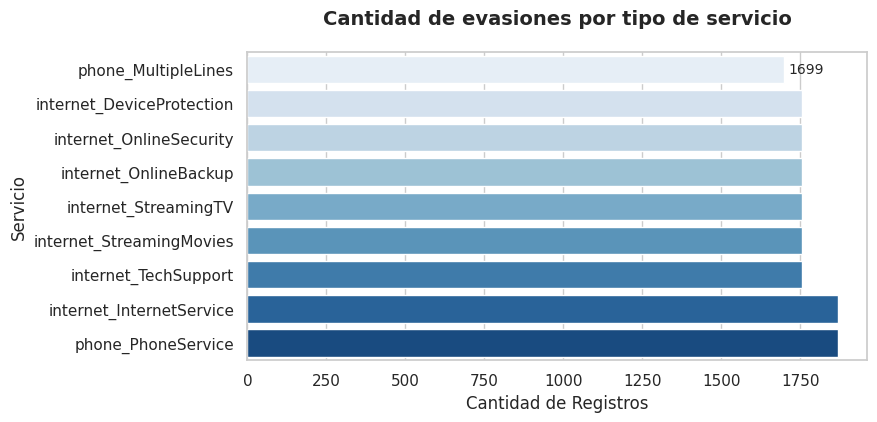

In [143]:
# Configurar el estilo visual de Seaborn
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 4))
grafico = sns.barplot(
    x=Evasion_por_servicio.values,
    y=Evasion_por_servicio.index,
    palette="Blues",  # Aplica un degradado de color automático
    hue=Evasion_por_servicio.index, # Recomendado en versiones nuevas para evitar warnings
    legend=False
)


plt.title('Cantidad de evasiones por tipo de servicio', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Cantidad de Registros', fontsize=12)
plt.ylabel('Servicio', fontsize=12)

#Agregar el número exacto al final de cada barra
grafico.bar_label(grafico.containers[0], fontsize=10, padding=3)

plt.show()

In [144]:
#Cant de servicios contratados por usuario que se dieron de baja
servicios_por_cliente = df_long.groupby('customerID')['valor'].count().sort_values(ascending=False)
servicios_por_cliente

,valor
customerID,
9992-RRAMN,9
0004-TLHLJ,9
0011-IGKFF,9
0013-EXCHZ,9
0022-TCJCI,9
...,...
0203-HHYIJ,3
0137-UDEUO,3
0031-PVLZI,3


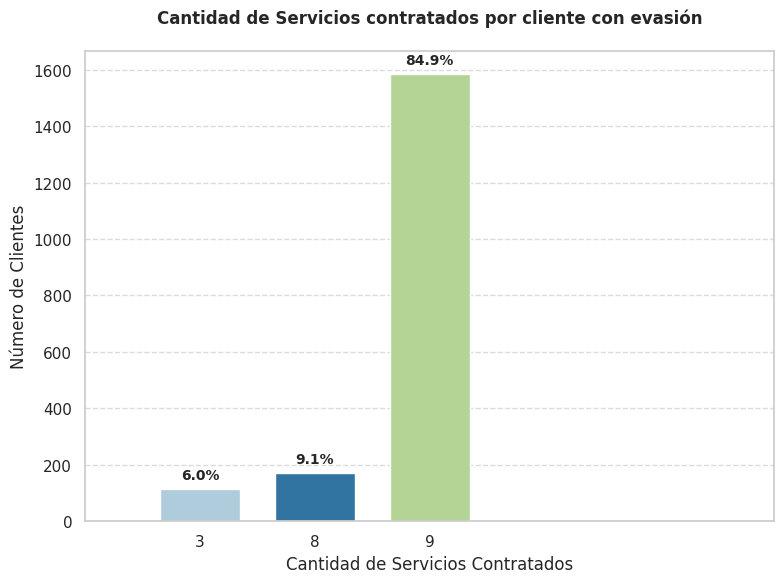

In [145]:
#Cant de servicios contratados por usuario que se dieron de baja (Gráfico)

plt.figure(figsize=(8, 6))
ax = sns.countplot(x=servicios_por_cliente, hue=servicios_por_cliente, palette='Paired', width=0.7, legend=False)

# --- Lógica para agregar los porcentajes ---
total = len(servicios_por_cliente) # Obtenemos el total de datos
for p in ax.patches:
    # Calculamos el porcentaje
    percentage = f'{100 * p.get_height() / total:.1f}%'

    # Obtenemos la ubicación de la barra
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()

    # Dibujamos el texto
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10, fontweight='bold', xytext=(0, 5), textcoords='offset points')
# -------------------------------------------

plt.title('Cantidad de Servicios contratados por cliente con evasión', fontsize=12, fontweight='bold', pad=20)
plt.xlabel('Cantidad de Servicios Contratados')
plt.ylabel('Número de Clientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(-1, 5)
plt.tight_layout() # Recomendado para que no se corten las etiquetas
plt.show()

## **Conteo de evasión por variables numéricas**

En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.
Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

In [146]:
#Contratación de servicios según rango etáreo

conteo = df_final['customer_SeniorCitizen'].value_counts().rename(index={0: 'Menor de 65 años', 1: 'Mayor de 65 años'})

print(conteo)


customer_SeniorCitizen
Menor de 65 años    5901
Mayor de 65 años    1142
Name: count, dtype: int64


In [147]:
#Analisis de evasión según rango etário

Rango_etario = (df_final.groupby('customer_SeniorCitizen')['Churn']
                .value_counts(normalize=True)
                .unstack()
                .rename(index={0: 'Menor de 65 años', 1: 'Mayor de 65 años'})
                .round(4)*100).map("{:.1f}%".format)
Rango_etario

Churn,No,Yes
customer_SeniorCitizen,,
Menor de 65 años,76.4%,23.6%
Mayor de 65 años,58.3%,41.7%


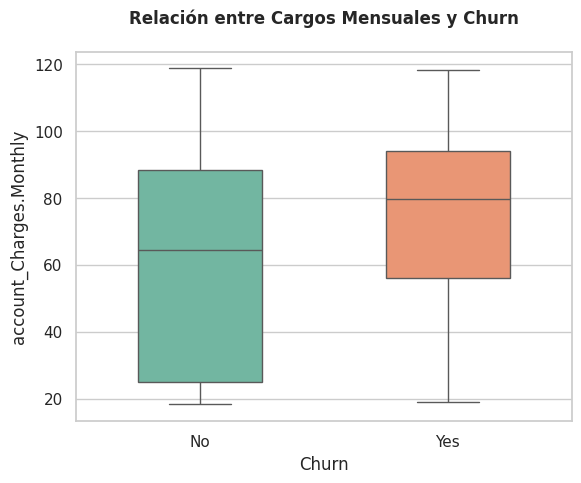

In [148]:
# Comparación de cargos mensuales
sns.boxplot(x='Churn', hue= 'Churn', y='account_Charges.Monthly', data=df_final, palette='Set2',width=0.5)
plt.title('Relación entre Cargos Mensuales y Churn', fontsize=12, fontweight='bold', pad=20)
plt.show()


In [149]:
#Total de gastos por cliente

# Resumen estadístico comparativo
Total_pagos = df_final.groupby('Churn')['account_Charges.Total'].describe()
print(Total_pagos)



        count         mean          std    min       25%       50%      75%  \
Churn                                                                         
No     5174.0  2550.968110  2328.943763  18.80  576.6625  1679.525  4262.85   
Yes    1869.0  1531.796094  1890.822994  18.85  134.5000   703.550  2331.30   

           max  
Churn           
No     8672.45  
Yes    8684.80  


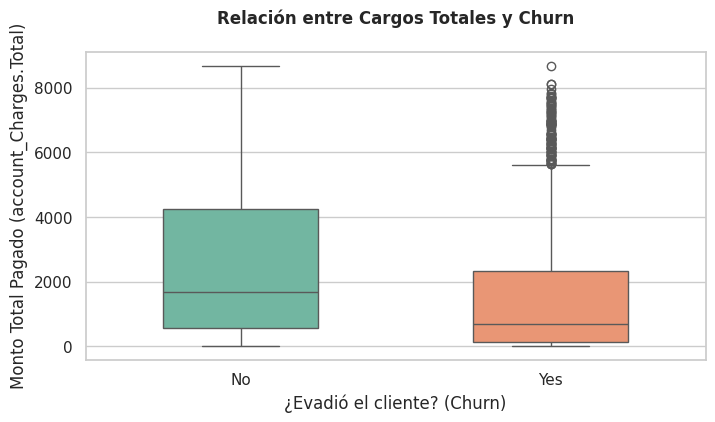

In [150]:
# Creación de gráfico tipo Boxplot

sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))


sns.boxplot(x='Churn', hue='Churn', y='account_Charges.Total', data=df_final, palette='Set2',width=0.5)


plt.title('Relación entre Cargos Totales y Churn', fontsize=12, fontweight='bold', pad=20)
plt.xlabel('¿Evadió el cliente? (Churn)', fontsize=12)
plt.ylabel('Monto Total Pagado (account_Charges.Total)', fontsize=12)

plt.show()

In [151]:
# 1. Aseguramos que la columna Churn sea numérica para calcular el promedio (tasa)
# Convertimos 'Si' a 1 y 'No' a 0
df_final['Churn_numeric'] = df_final['Churn'].map({'Yes': 1,'No': 0})

# 2. Agrupamos por tipo de contrato y tiempo de tenencia
resultado = (df_final.groupby(['account_Contract', 'customer_tenure'])['Churn_numeric'].mean() * 100).map("{:.1f}%".format)

# 3. Convertimos a DataFrame para una mejor visualización
Tiempo_de_permanencia = resultado.reset_index()
Tiempo_de_permanencia.columns = ['Contrato', 'Tenencia', '% Evasión']

print(Tiempo_de_permanencia)

           Contrato  Tenencia % Evasión
0    Month-to-month         1     62.9%
1    Month-to-month         2     52.6%
2    Month-to-month         3     49.2%
3    Month-to-month         4     49.7%
4    Month-to-month         5     49.2%
..              ...       ...       ...
213        Two year        68      3.1%
214        Two year        69      3.0%
215        Two year        70      5.7%
216        Two year        71      3.6%
217        Two year        72      1.2%

[218 rows x 3 columns]


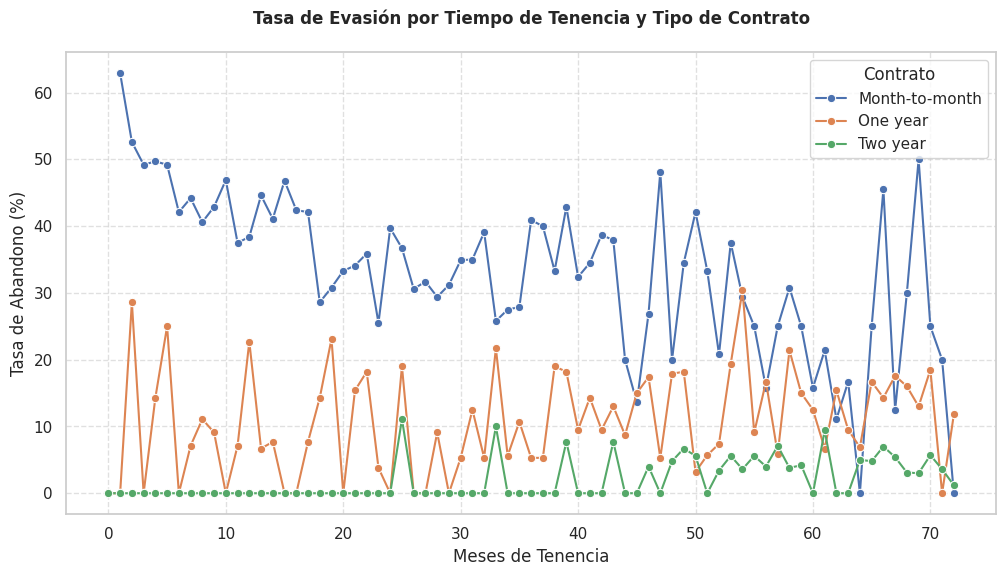

In [152]:
# Convertimos el % a float para poder graficarlo
Tiempo_de_permanencia['% Evasión Num'] = Tiempo_de_permanencia['% Evasión'].str.rstrip('%').astype(float)

plt.figure(figsize=(12, 6))
sns.lineplot(data=Tiempo_de_permanencia, x='Tenencia', y='% Evasión Num', hue='Contrato', marker='o')

plt.title('Tasa de Evasión por Tiempo de Tenencia y Tipo de Contrato',fontsize=12, fontweight='bold', pad=20)
plt.xlabel('Meses de Tenencia')
plt.ylabel('Tasa de Abandono (%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

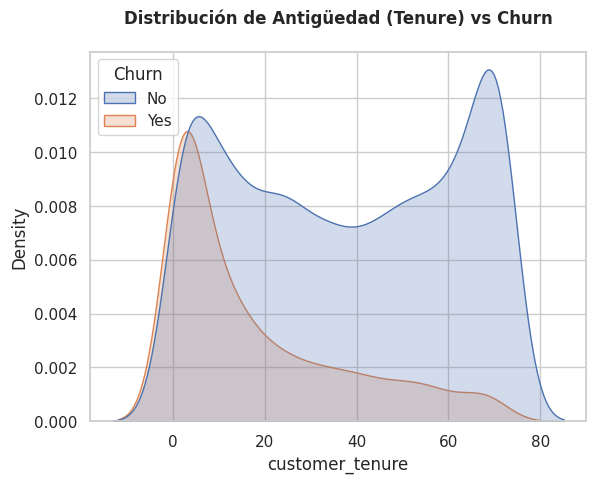

In [153]:
# Distribución de la antigüedad
sns.kdeplot(data=df_final, x='customer_tenure', hue='Churn', fill=True)
plt.title('Distribución de Antigüedad (Tenure) vs Churn',fontsize=12, fontweight='bold', pad=20)
plt.show()

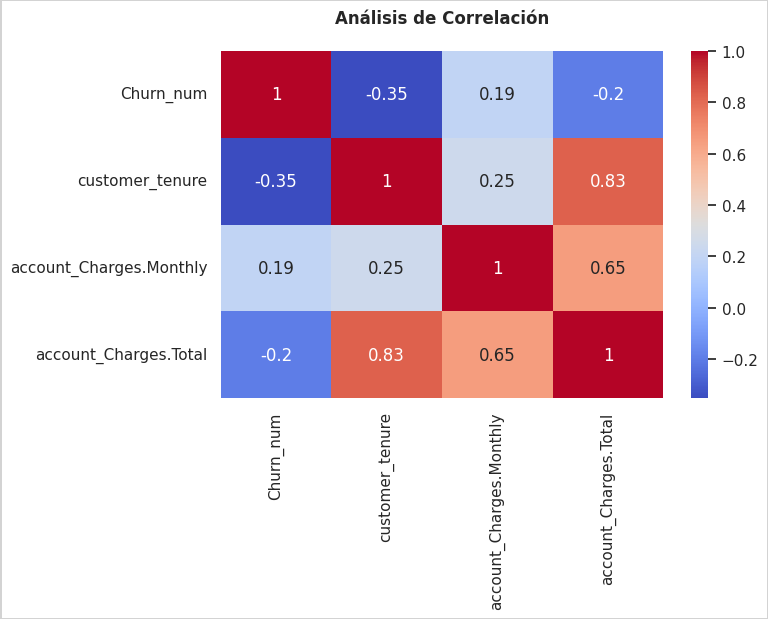

In [154]:
# Análisis de Correlación (Mapa de Calor)


plt.figure(figsize=(8, 6), linewidth=2, edgecolor='lightgray')

# Convertir Churn a numérico
df_final['Churn_num'] = df_final['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Calcular correlaciones
correlaciones = df_final[['Churn_num', 'customer_tenure', 'account_Charges.Monthly', 'account_Charges.Total']].corr()

# Dibujar el heatmap
sns.heatmap(correlaciones, annot=True, cmap='coolwarm')

# Ajustar el diseño para que el borde no se corte
plt.tight_layout()
plt.title('Análisis de Correlación',fontsize=12, fontweight='bold', pad=20)
plt.show()

In [160]:
#Guardar datos normalizados - tratados pero en archivo .csv
df_long.to_csv("datos_TelecomX_tratados.csv", index=False)

In [161]:
#Abriendo el archivvo guardado para verificar que este todo bien (esta es la data con la que se trabajará el Challenge3
pd.read_csv("datos_TelecomX_tratados.csv")

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,tipo_de_servicio,valor
0,0004-TLHLJ,Yes,Male,0,No,No,4,Month-to-month,Yes,Electronic check,73.90,280.85,phone_PhoneService,Yes
1,0011-IGKFF,Yes,Male,1,Yes,No,13,Month-to-month,Yes,Electronic check,98.00,1237.85,phone_PhoneService,Yes
2,0013-EXCHZ,Yes,Female,1,Yes,No,3,Month-to-month,Yes,Mailed check,83.90,267.40,phone_PhoneService,Yes
3,0022-TCJCI,Yes,Male,1,No,No,45,One year,No,Credit card (automatic),62.70,2791.50,phone_PhoneService,Yes
4,0023-HGHWL,Yes,Male,1,No,No,1,Month-to-month,Yes,Electronic check,25.10,25.10,phone_PhoneService,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15968,9948-YPTDG,Yes,Male,0,Yes,No,38,Month-to-month,Yes,Electronic check,79.45,3013.05,internet_StreamingMovies,Yes
15969,9961-JBNMK,Yes,Male,1,No,No,21,Month-to-month,Yes,Bank transfer (automatic),96.80,2030.30,internet_StreamingMovies,Yes
15970,9965-YOKZB,Yes,Male,1,No,No,9,Month-to-month,Yes,Electronic check,83.85,790.15,internet_StreamingMovies,Yes
15971,9985-MWVIX,Yes,Female,0,No,No,1,Month-to-month,Yes,Mailed check,70.15,70.15,internet_StreamingMovies,Yes


# **INFORME FINAL**

# **Análisis de Evasión de Clientes para la empresa Telecom X**

###**Introducción**

Telecom X, es una empresa que se dedica a proporcionar servicios de telefonía e internet, contando para ello con diferentes modalidades que permite llegar a más usuarios. Actualmente la empresa ha estado experimentando una alta tasa de fuga de clientes, motivo por el cual se hace necesario comprender los factores que están desencadenando está situación. Para poder determinar los motivos que están causando la cancelasión de cuentas, se estará llevando a cabo un análisis detallado de los datos proporcionados por la empresa, para lograrlo se estará empleando Python y sus principales bibliotecas lo que permitirá extraer y procesar información relevante que permita dilusidar porque esta ocurriendo dicha situación para porder tomas las medidas necesarias y evitar que la evasión continue ocurriendo.

###**Limpieza y Tratamiento de Datos**

Para llevar a cabo el análisis, se contaba con un archivo en formato Json, el cual contenía los datos de la empresa Telecom X.

Previo a la carga de los datos en colab, el archivo fue revisado en https://jsonviewer.stack.hu/ y en https://jsoncrack.com/editor para entender como estaban estructurados los datos.

**Pasos llevados a cabo usando Python:**

1. Se importaron las bibliotecas con las que se estaría trabajando:

*   import pandas as pd
*   import numpy as np
*   import matplotlib.pyplot as plt
*   import seaborn as sns

2. Se realizó la importación de los datos usando la biblioteca pandas para convertirlos en un DataFrame.

3. Se normalizaron los datos, para poder dejar en columnas separadas todos aquellos datos que estaban en forma de libreria, pasando de tener *(7267 rows × 6 columns) a (7267 rows × 21 columns)*, esta acción permitió poder comerzar a trabajar con la data.

4. Se revisó la información con .info(), para conocer el tipo de dato de cada columna y si habian valores nulos. Concluyendo que se contaba con lo siguiente:i*dtypes: float64(1), int64(2), object(18)*.Lo mas relevante de esta revisión es que la columna 'account_Charges.Total' estaba clasificada como tipo objeto y había convertirla en datos tipo float64, ya que la columna contiene valores númericos decimales.

5. Se verificó si habían espacios en blanco en cada una de las columnas y en efecto 2 de las columnas contenían valores en blanco, (224 en 'Churn') y (11 en 'account_Charges.Total'), en el caso de Churn se filtraron solo los registros que no estuviesen en blanco, mientras que para la columna de valores Totales hubo que calcular sus valores a través de la sumatoria de los valores de la columna 'account_Charges.Monthly'.

6. Posteriormente para poder realizar análisis por categorías fue necesario redefinir el DataFrame de tipo wide a long, esto permitió poder analizar los tipos de servicios brindados; ademas se estandarizaron los valores asociados a los servicios para poder tener la data correcta, para ello se definió una librería de la siguiente manera:
mapeo = {
    'Yes': 'Yes',
    'No': 'Yes',
    'No internet service': 'No',
    'No phone service': 'No',
    'Fiber optic': 'Yes',
    'DSL': 'Yes',}

###**Análisis Exploratorio de Datos**

Durante la exploración de los datos para obtener parametros, que permitieran determinar porque se estaba presentando la evasión de clientes se realizaron los siguientes tipos de análisis:

**1. Análisis descriptivo**

Este analisis permitió conocer variables como:

|index|customer\_SeniorCitizen|customer\_tenure|account\_Charges\.Monthly|account\_Charges\.Total|
|---|---|---|---|---|
|count|7043\.0|7043\.0|7043\.0|7043\.0|
|mean|0\.16|32\.37|64\.76|2280\.51|
|std|0\.37|24\.56|30\.09|2266\.12|
|min|0\.0|0\.0|18\.25|18\.8|
|25%|0\.0|9\.0|35\.5|400\.15|
|50%|0\.0|29\.0|70\.35|1394\.55|
|75%|0\.0|55\.0|89\.85|3786\.6|
|max|1\.0|72\.0|118\.75|8684\.8|

Donde se puede observa que se cuenta con 7043 registros, que los clientes en promedio han mantenido sus servicios contratados por 32.37 meses, los cargos totales que los clientes han pagado por sus servicios han sido en promedio 2280.51, siendo los valores min:18.8 y max:8684.8 (dolares).

**2. Distribución de evasión**

Se puede observar que para la columna Churn, 5174 registros corresponden a usuarios que no se han dado de baja y 1869 a usuarios que si calcelaron sus servicios. En el siguiente gráfico se puede apreciar mas fácil la distribución porcentual:

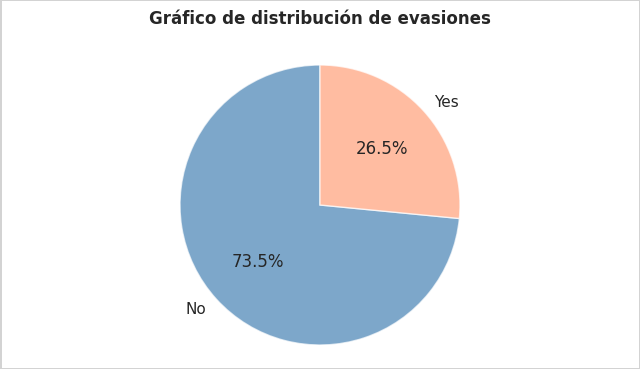

**3. Recuento de evasión por variables categóricas**

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras. Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

*Evasión según tipo de contrato*

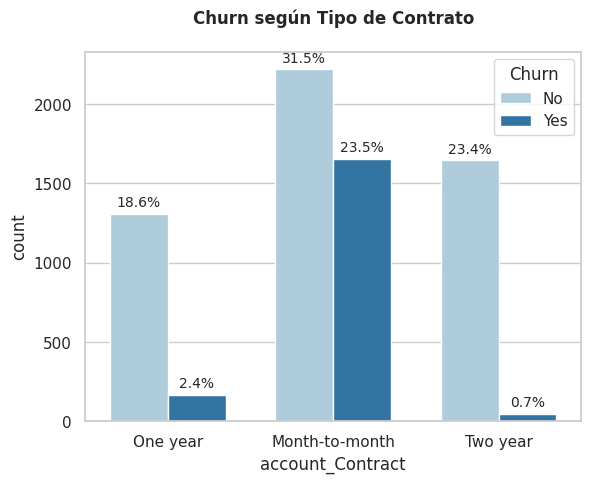

*Comportamiento que tuvieron los consumidores según su genero*: el % de evasión por sexo es muy similar, por lo que no es un factor determinante para una conclusión
|customer\_gender|No|Yes|
|---|---|---|
|Female|73\.1%|26\.9%|
|Male|73\.8%|26\.2%|

*Tendencia a la evasión de acuerdo a nivel de carga familiar*: este resultado arrojó las personas que evadieron tienen una carga familiar del 15.4% la cual es menor a la carga familiar de las personas que no evadieron, por lo que parece no influir la cantidad de carga familiar en su decisión de dar de baja el servicio
|customer\_Dependents|No|Yes|
|---|---|---|
|No|68\.7%|31\.3%|
|Yes|84\.5%|15\.4%|

*Influencia que podría tener la pareja sobre la desición de los usuarios*: está evaluación arrojó que solo el 19.7% de los consumidores con pareja se dió de baja mientras el 80,3% de los usurios con pareja mantuvo sus servicios con Telecom X.
|customer\_Partner|No|Yes|
|---|---|---|
|No|67\.0%|33\.0%|
|Yes|80\.3%|19\.7%|

*Servicios que más presentaron evasión*: los servios con mayor evasión, fueron el de internet y el de telefonía movil con un número de evasiones totales de 1869 cada uno.

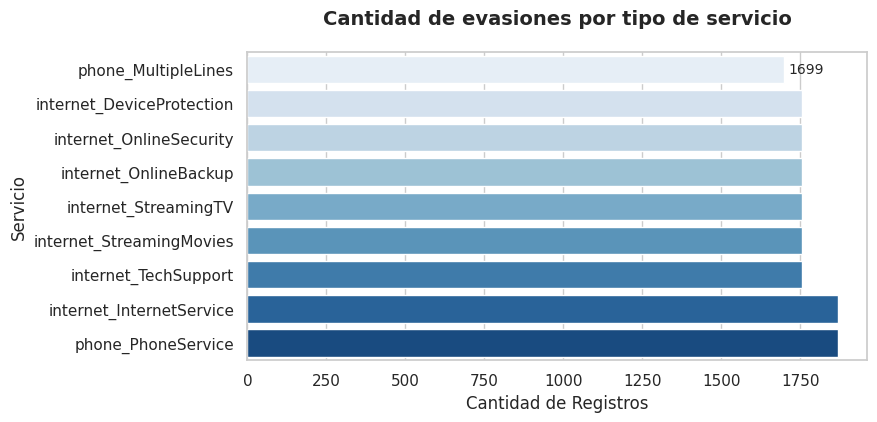

Otro dato interesante de analizar es la cantidad de servicios contratados por los usuarios que se dieron de baja, donde se puede observar que la mayor cantidad de usuarios habían contratado 9 servicios, los resultados se muestran a continuación:


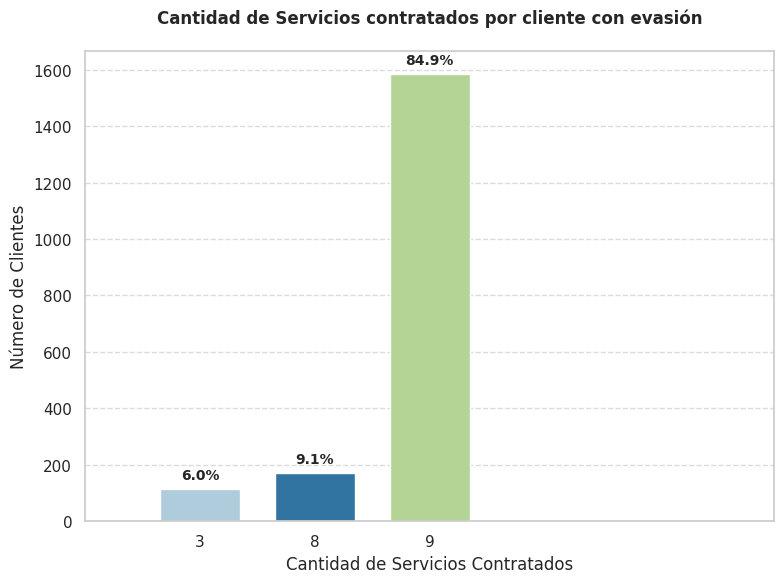


**4. Conteo de evasión por variables numéricas**

En este paso, se explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron. Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

*Análisis de evasión según rango etario*, este análisis determinó que los clientes que mayormente se dieron se baja fueron los mayores de 65 años.

|customer\_SeniorCitizen|No|Yes|
|---|---|---|
|Menor de 65 años|76\.4%|23\.6%|
|Mayor de 65 años|58\.3%|41\.7%|


*Relación entre cargos mensuales y evasión* este análisis muestra que los clientes con evasión mensualmente pagaron montos mas altos que los que no se dieron de baja.

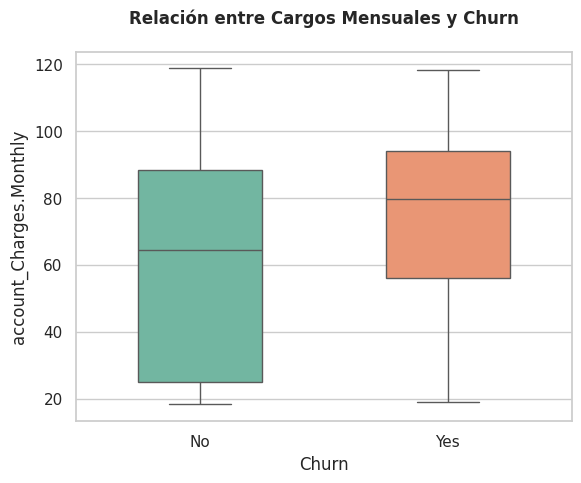

*Tasa de evasión por tiempo de tenencia y tipo de contrato*:
En los siguientes gráficos se puede apreciar como la evasió fue mayor en clientes con tipo de contrato mensual y que los valores de evasión mas altos sucediron en el primer mes de tenencia

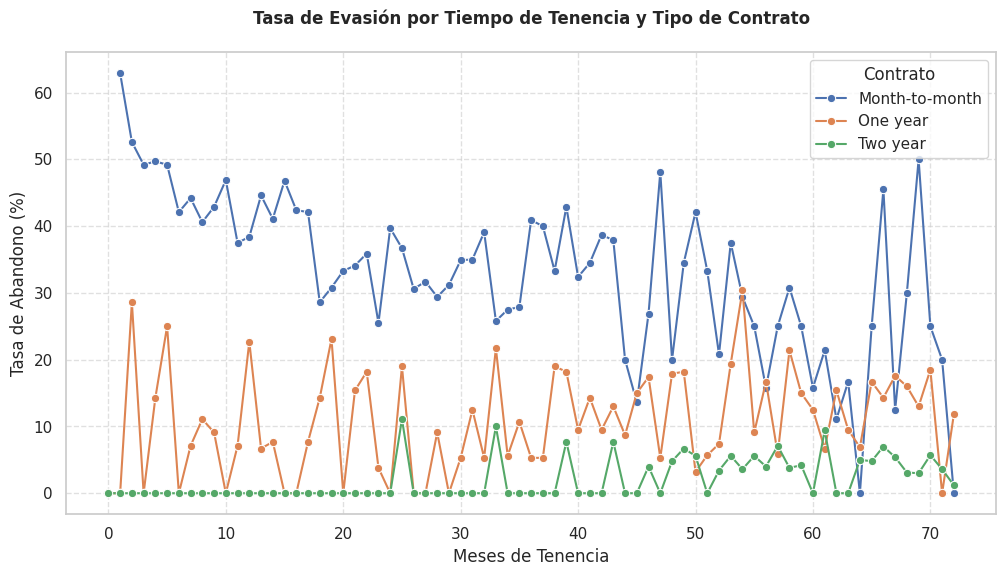

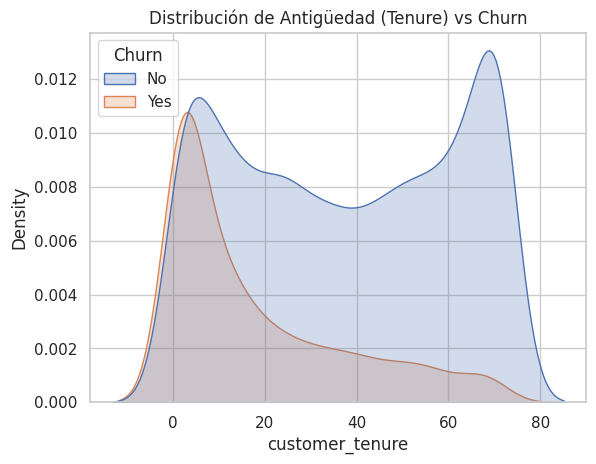

*Correlación de variables númericas*

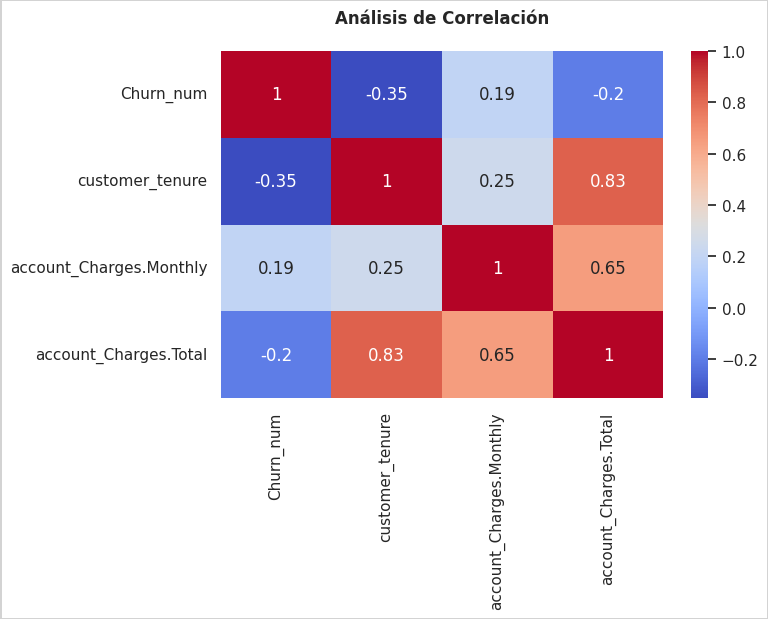


##**Conclusiones e Insights**

Como aspectos a resaltar tenemos que el 26,5% del total de clientes presentó evasión.

En variables como el tipo de contrato se observó que el 80% de los clientes que se dieron de baja mantenian contratos de tipo mensual, en cuanto a la cantidad de servicios contratados por estos usuarios el 84,9% contrató hasta 9 servicios, además se pudo apreciar que los cargos mensuales de los usuarios que se dieron de baja eran más altos de los que se quedaron,en cuanto al tiempo de tenencia el 62,95% de estos consumidores solo mantuvieron sus cuentas activas por 1 mes.

Por otra parte, el factor etario reflejó que suelen darse más de bajas personas mayores a 65 años.

Variables como el sexo, la carga familiar y estar en pareja no influyen significativamente en la decisión de dar de baja los servicos contratados.

En conclusión, con todo lo analizado anteriormente podemos visualizar que hay un problema de retención temprana de clientes, lo que indica que la experiencia inicial no está asociada con el costo o la calidad del servicio.


##**Recomendaciones**

*  Dar una asesoria tecnica detallada a los clientes sobre el uso de los servicios en especial para aquellos que tienen contratados muchos servicios que podrían llegar a ser complejos en uso.

*  Comprobar la satisfacción con los servicios contratados, a traves de encuestas o llamaadas telefonicas las primeras semanas de uso.

*  Evaluar la calidad del servicio brindado vs el costo.

*  Incentivar el tipo de contratación, dar bonos por lealtad o tarifas diferenciadas para clientes que contraten servicios superiores a un mes.
